In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/AI_1333/AI_Tuan6

/content/drive/MyDrive/AI_1333/AI_Tuan6


In [ ]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode (connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI_1333/AI_Tuan5_2/dataset.csv')
data

,Place,Rainfall,Terrain,Fertilisers,Groundwater,Harvest
0,P1,High,Plains,Yes,Yes,Burnper
1,P2,Low,Hills,No,Yes,Meagre
2,P3,Low,Plateau,No,Yes,Moderate
3,P4,High,Plateau,No,Yes,Moderate
4,P5,High,Plains,Yes,No,Burnper
5,P6,Low,Hills,No,No,Meagre
6,P7,Low,Plateau,No,No,Meagre
7,P8,Mild,Plateau,No,No,Moderate
8,P9,High,Hills,Yes,Yes,Burnper
9,P10,Mild,Plateau,Yes,Yes,Burnper


In [ ]:
X = data.iloc[:,1:-1] # Thi 50%: Sửa -1
X

,Rainfall,Terrain,Fertilisers,Groundwater
0,High,Plains,Yes,Yes
1,Low,Hills,No,Yes
2,Low,Plateau,No,Yes
3,High,Plateau,No,Yes
4,High,Plains,Yes,No
5,Low,Hills,No,No
6,Low,Plateau,No,No
7,Mild,Plateau,No,No
8,High,Hills,Yes,Yes
9,Mild,Plateau,Yes,Yes


In [ ]:
y = data.iloc[:,5] # Thi 50%: Lấy cột thứ 5 trong bản, cột thứ 5 là cột quyết định
y

0      Burnper
1       Meagre
2     Moderate
3     Moderate
4      Burnper
5       Meagre
6       Meagre
7     Moderate
8      Burnper
9      Burnper
10    Moderate
11    Moderate
12    Moderate
13    Moderate
14    Moderate
15      Meagre
16      Meagre
17      Meagre
18    Moderate
19    Moderate
Name: Harvest, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,Rainfall,Terrain,Fertilisers,Groundwater
0,0,1,1,1
1,1,0,0,1
2,1,2,0,1
3,0,2,0,1
4,0,1,1,0
5,1,0,0,0
6,1,2,0,0
7,2,2,0,0
8,0,0,1,1
9,2,2,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier() # Sử dụng một cây quyết định để dự đoán một nhãn đầu vào
regressor.fit(X.iloc[:,1:5],y) # hàm .fit là Huấn luyện mô hình (train module)
X_in = np.array([0, 0,0])
#X_in = np.array([0,0,0])
y_pred = regressor.predict([X_in]) # .predict : Hàm dự đoán . Đưa ra kết quả kiểu thử
y_pred # Trả về nhánh bất kỳ

# Đánh giá độ chính xác 

# Nhận diện chử số viết tay: BƯớc kiểm thử - 

# BTVN: Sử dụng dữ liệu dòng 5 (bất kỳ), trong bảng để trả về không mua máy tính

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['Meagre'], dtype=object)

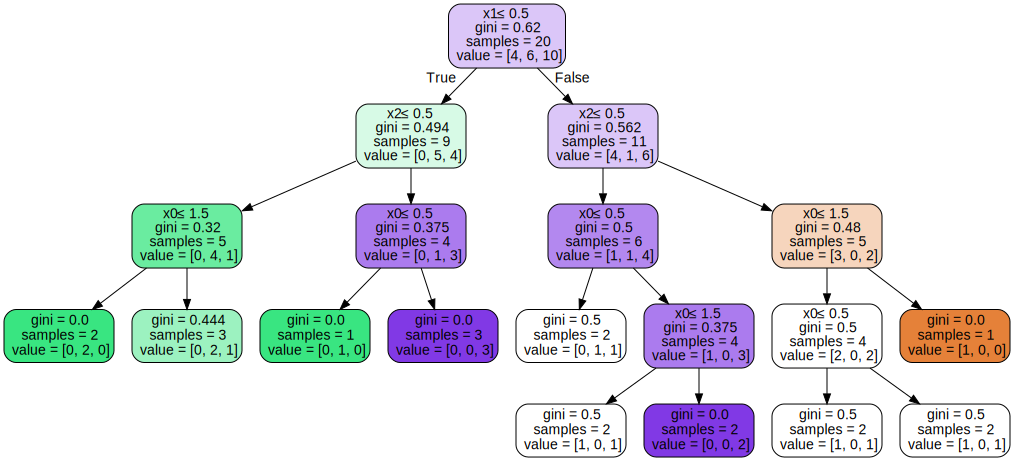

In [ ]:
# Cách 1: 
# Sử dụng thư viện sklearn, pydotplus, StringIO
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# from IPython.display import Image

# import pydotplus
# dot_data = StringIO()
# export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# file_name = 'Tree_Less1.png'
# graph.write_png (file_name)
# Image(file_name)


## Cách 2: Tốt nhất!!!
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(regressor, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph1.format = 'png' # Đặt định đạng png khi xuất file
graph1.render("Tree_Less2") # Đặt tên file
graph # In ảnh ra colab


# Conda: conda install graphviz
# HomeWork : Lưu tấm hình cây với tên, Show ảnh